# fasta2png
*smaller filesize than NCBI, fastest handling*

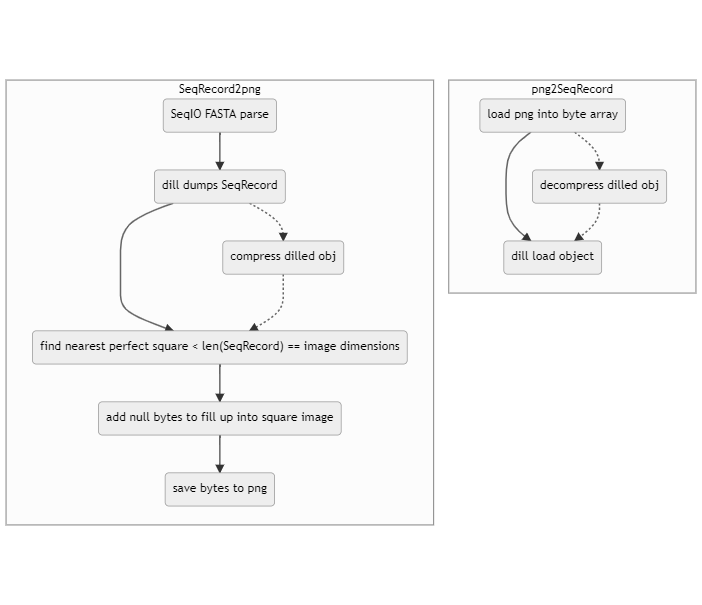

## Workflow variants
Standard workflow variant does not include secondary compression, the only compression occurs while saving into png file.
Other variants include secondary compression:
 - ppm (predict by partial matching)
 - lz4
 - bz2
 - zstandard

### Standard workflow code

In [ ]:
import math
import dill
from Bio import SeqIO
from PIL import Image
from timeit import default_timer as timer

__author__ = "Maciej Michalczyk"

file = ""
output = ""

# assuming single record for now
seq_obj, = SeqIO.parse(file, 'fasta')
# object dump
p_seq = dill.dumps(seq_obj)
# closest square root
dim = math.floor(math.sqrt(len(p_seq))) + 1
# final size
target = dim * dim
# # how much needed to fill up the target
diff = target - len(p_seq)
# final data
n_seq = p_seq + bytes(int(diff))
# save image from bytes with P image mode - 8-bit pixels, mapped to any other mode using a color palette - most space saved without disrupting the data
img = Image.frombytes('P', (int(dim), int(dim)), n_seq)
img.save(output)
